# Exploratory Analysis and Data Visualization of US Electricity Generation

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
df = pd.read_csv('../final.csv',encoding='utf-8')
df['date']= pd.to_datetime(df.date)
df_prices = pd.read_csv('../prices.csv',encoding='utf-8')


In [3]:
df.head()

,state,date,fossil,geo,hydro,nuclear,secondary,solar,wind,population
0,AK,2001-01-01,485509.641,NaN,104549.118,NaN,NaN,NaN,86.518,635956
1,AK,2001-02-01,455981.194,NaN,90110.610,NaN,NaN,NaN,74.121,636650
2,AK,2001-03-01,487191.377,NaN,99843.153,NaN,NaN,NaN,80.502,637344
3,AK,2001-04-01,404013.012,NaN,84614.771,NaN,NaN,NaN,70.577,638038
4,AK,2001-05-01,399488.266,NaN,85130.287,NaN,NaN,NaN,69.214,638732


In [4]:
df.fillna(0,inplace=True)

In [5]:
energy_list=["fossil","geo","hydro","nuclear","secondary","solar","wind"]
state_list=df.state.unique().tolist()

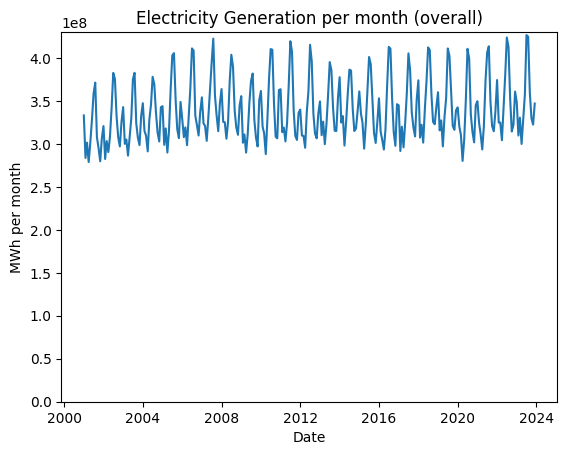

In [24]:
df_total_energy = pd.DataFrame(df.groupby('date')[energy_list].sum().sum(axis=1)).reset_index().rename(columns={0:'energy generation'})
df_total_energy['date'] = pd.to_datetime(df_total_energy.date)
sns.lineplot(data=df_total_energy, x='date', y='energy generation')
#df_total_energy.info()
plt.ylim((0,4.3*1e8));
plt.title("Electricity Generation per month (overall)");
plt.ylabel('MWh per month');
plt.xlabel('Date');


We see that electricity generation follows annual peaks and troughs, with peaks around the middle of the year and troughs around the beginning and ends of the year.

The total electricity generated is trending upwards since the early 2000's.

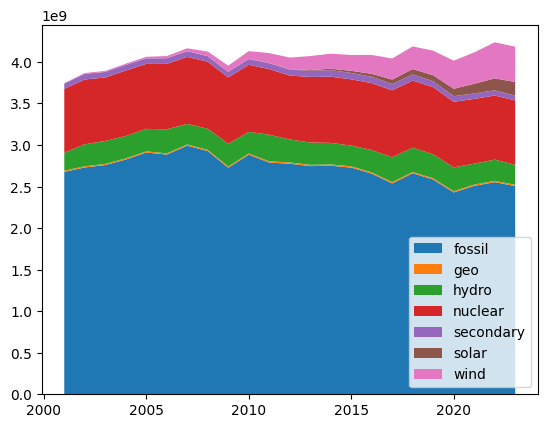

In [25]:
df_2_energy_by_group = df.groupby(df.date.dt.year)[energy_list].sum().reset_index()
#df_2_energy_by_group['date'] = pd.to_datetime(df_2_energy_by_group.date)
#df_2_energy_by_group
ax = plt.stackplot(df_2_energy_by_group.date , df_2_energy_by_group[energy_list].T);
#plt.yscale('log')
#plt.legend()
proxy_rects = [Rectangle((0, 0), 1, 1, fc=pc.get_facecolor()[0]) for pc in ax]
plt.legend(proxy_rects, energy_list, loc="lower right");
#ax[0].get_facecolor()[0]

Fossil Fuels still make up a bulk of the energy generated, with over 60% of the electricity generated in 2023 being by fossil fuels. The electricity generation by nuclear is stable throughout this period, at around 0.7GWh produced per year.

The biggest incease has been in wind energy - in the early 2000's it account for a negligible percentage of total electricity production, however by 2023 it has increased to a respectable 10% of total electricity production.

Solar energy is still lagging far behind in terms of electricity generation, however has been gradually increasing since 2015.

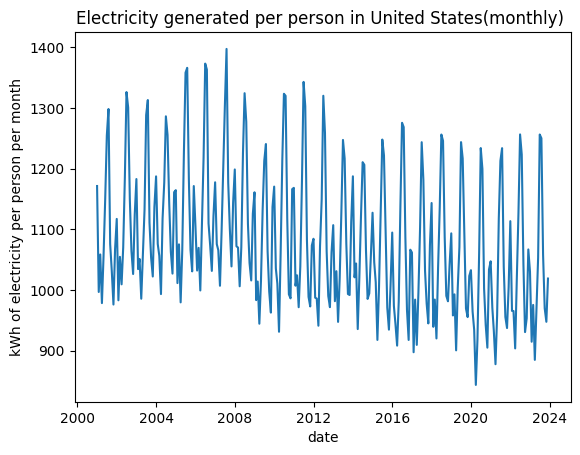

In [8]:
df_3_energy_per_pop = df.drop('state',axis=1).groupby('date').sum().reset_index()
df_3_energy_per_pop[energy_list] = df_3_energy_per_pop[energy_list].div(df_3_energy_per_pop['population'],axis=0)
df_3_energy_per_pop['total'] = df_3_energy_per_pop[energy_list].sum(axis=1) * 1000
sns.lineplot(data=df_3_energy_per_pop,x='date',y='total');
plt.title('Electricity generated per person in United States(monthly) ');
plt.ylabel('kWh of electricity per person per month');

Interstingly - though the electricity generation has been increasing since early 2000's, units consumer per capita seems to be decreasing. This is more evident at a coarser granularity of per-year instead of per-month :

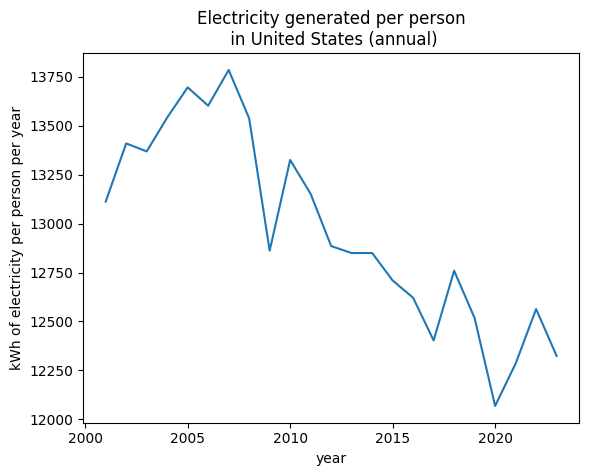

In [9]:
df_4_energy_per_pop_yearwise = df_3_energy_per_pop
df_4_energy_per_pop_yearwise['year'] = df_4_energy_per_pop_yearwise.date.dt.year
df_4_energy_per_pop_yearwise = df_4_energy_per_pop_yearwise.drop('date',axis=1).groupby('year').agg({'population':'mean' ,  'total':'sum' }).reset_index()
#df_4_energy_per_pop_yearwise
sns.lineplot(data=df_4_energy_per_pop_yearwise,x='year',y='total');
plt.title('Electricity generated per person\n in United States (annual)');
plt.ylabel('kWh of electricity per person per year');


The electricity consumed per capita was between 13,000 and 13,250 units per person in around 2001 and peaked in 2006 at ~13,750 units per person per year. Since then it has steadily fallen, reaching ~12,250 units per person per year in 2023.

There are exaggerated dips in 2008 ( likely corrresponding to the 2008 Financial Crisis) and again in 2020 ( likely corresponding to the Covid-19 pandemic). As per my intuition, these would likely be caused to drops in industrial and commercial demands rather than residential electricity demands, however further analysis would need to be done to ascertain this claim.

<Axes: xlabel='state'>

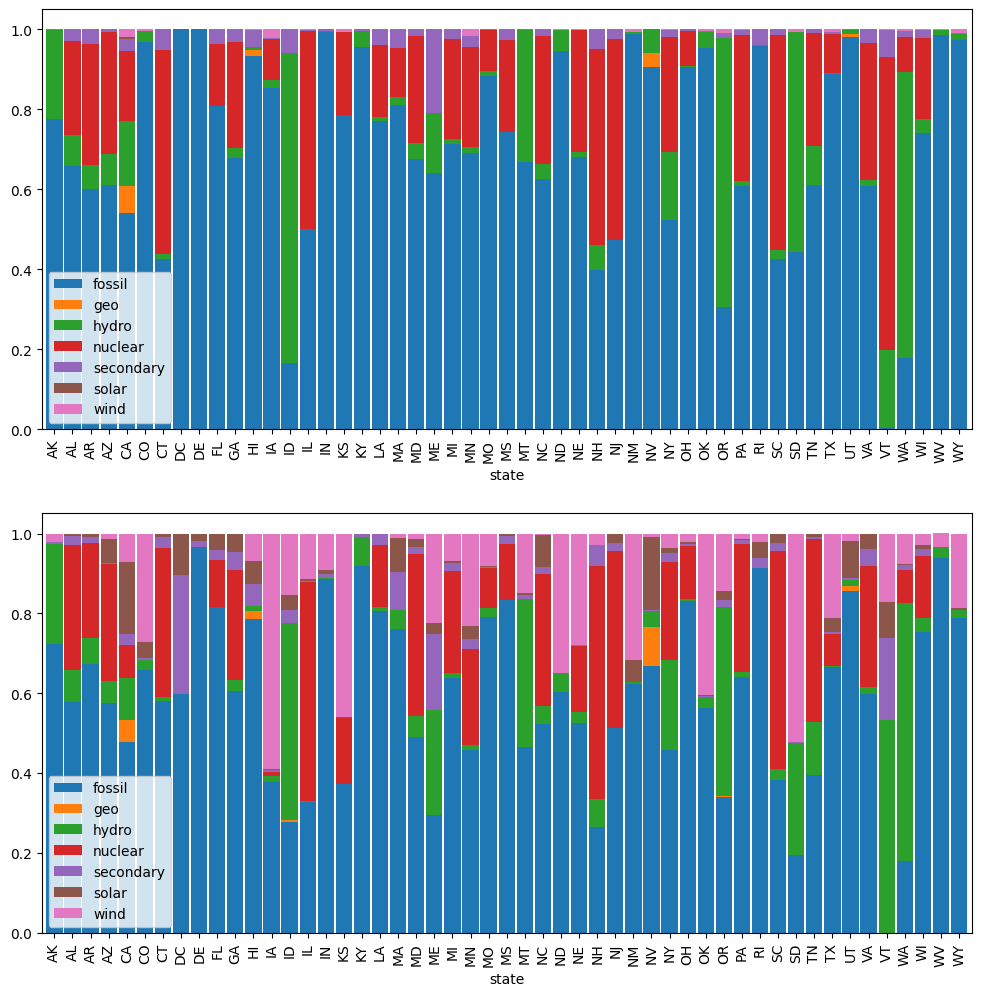

In [26]:
df_5_statewise =df.copy()
df_5_statewise['total'] = df_5_statewise[energy_list].sum(axis=1)
#df_5_statewise
df_5_statewise['year'] =df_5_statewise.date.dt.year//5 *5
df_5_statewise = df_5_statewise.drop(['date','population'],axis=1).groupby(['year','state']).mean().reset_index()
df_5_statewise[energy_list] = df_5_statewise[energy_list].div(df_5_statewise['total'],axis=0)
df_5_statewise.drop('total',axis=1,inplace=True)
fig, ax = plt.subplots(2,1,figsize=(12,12))
df_5_statewise.loc[df_5_statewise.year==2000].drop('year',axis=1).plot(ax=ax[0], kind='bar',stacked=True, x='state',width=0.9)
df_5_statewise.loc[df_5_statewise.year==2020].drop('year',axis=1).plot(ax=ax[1], kind='bar',stacked=True, x='state',width=0.9)


The biggest change since the early 2000's to the early 2020's is the massive adoption of wind energy across the states, noticeably with it accounting for around half of the demand in Iowa, Kansas and South Dakota.
Most states still average around half of their electricity generation from fossil fuels with it accounting for > 90% of the generation in some states (e.g. Delaware, Wyoming, Utah).

Solar adoption is noticeable in many states, however in most of these it contributes very less to to the total energy production. By percentage, California and Nevada have the largest percentage of solar energy production, where it accounts for ~20% of the total electricity produced.

In [31]:
df_6_lowest_prices = df_prices.drop(energy_list+['population'],axis=1).drop(['commercial','industrial','residential'],axis=1)
df_6_lowest_prices['date']= pd.to_datetime(df_6_lowest_prices.date)

df_6_lowest_prices['year']= (df_6_lowest_prices.date.dt.year//10 * 10).astype(int)
df_6_lowest_prices = df_6_lowest_prices.drop('date',axis=1)
df_6_lowest_prices = df_6_lowest_prices.groupby(['year','state']).mean().reset_index().pivot(columns='state',index='year',values='all sectors').rename_axis(columns=None).reset_index()
df_6_lowest_prices = df_6_lowest_prices.drop('year',axis=1).rank(method='dense',axis=1).T
df_6_lowest_prices.columns = [i for i in df_6_lowest_prices.columns]


df_6_lowest_prices[(df_6_lowest_prices[0]<=3.0) |  (df_6_lowest_prices[1]<=3.0) | (df_6_lowest_prices[2]<=3.0) | 
                   (df_6_lowest_prices[0]>=48.0) |  (df_6_lowest_prices[1]>=48.0) | (df_6_lowest_prices[2]>=48.0) ].rename(columns={0:2000,1:2010,2:2020}).astype(int)


,2000,2010,2020
AK,45,50,48
CA,44,44,50
CT,49,49,49
HI,51,51,51
ID,3,2,2
KY,1,7,14
MA,48,48,47
ND,7,11,3
NY,50,45,43
WA,8,1,7


Overall, Idaho and Wyoming have the lowest costs of electricity per unit across the decades. Kentucky had the lowest average rates in 2000-2010, howver has fallen into the middle of the pack by 2020.
Massachusetts, Connecticut, California, Alaska and Hawaii consistently have the highests costs for electricity throughout the 2000's. 

In [30]:
ind = 'residential'
df_6_lowest_prices = df_prices.drop(energy_list+['population'],axis=1).drop(['commercial','industrial','all sectors'],axis=1)

df_6_lowest_prices['date']= pd.to_datetime(df_6_lowest_prices.date)

df_6_lowest_prices['year']= (df_6_lowest_prices.date.dt.year//10 * 10).astype(int)
df_6_lowest_prices = df_6_lowest_prices.drop('date',axis=1)
df_6_lowest_prices = df_6_lowest_prices.groupby(['year','state']).mean().reset_index().pivot(columns='state',index='year',values='residential').rename_axis(columns=None).reset_index()
df_6_lowest_prices = df_6_lowest_prices.drop('year',axis=1).rank(method='dense',axis=1).T
df_6_lowest_prices.columns = [i for i in df_6_lowest_prices.columns]

df_6_lowest_prices[(df_6_lowest_prices[0]<=3.0) |  (df_6_lowest_prices[1]<=3.0) | (df_6_lowest_prices[2]<=3.0) | 
                   (df_6_lowest_prices[0]>=48.0) |  (df_6_lowest_prices[1]>=48.0) | (df_6_lowest_prices[2]>=48.0) ].rename(columns={0:2000,1:2010,2:2020}).astype(int)


,2000,2010,2020
AK,46,49,46
CA,42,43,48
CT,49,50,49
HI,51,51,51
ID,1,3,2
KY,3,7,15
LA,19,2,6
MA,48,47,50
NY,50,48,43
UT,9,8,3


The states with the lowest domestic costs are Idaho, West Virginia, and Washington. Kentucky had the lowest prices in 2000-2010 but has since had its rank increased. Interestingly Loisiana has reduced its rank considerably, from 19 in 2000-2010 to 6 in the 2020's.

Massachusetts, Connecticut, California, New York and Hawaii consistently have the highests costs for electricity throughout the 2000's. California fares better here compares to overall statistics, possibly due to higher costs to commercial/industrial sector as compared to residential sector.


## Conclusion

In this section we took a look at our cleaned dataset and found some interesting data points:
> 1. Electricity generation in the United States follows a cyclic pattern, with highs in the middle of the year followed by lows  in the beginning/ends of the year.
> 2. Electricity production has increased since 2001 by around 10%. The majority of the increased capacity was due to addition of wind energy. Generation using fossil fuels has trended downwards, reducing by ~15% since peak generation in 2007.
> 3. Adoption of solar energy into the mix has been slow, increasing only since 2015. California and Nevada have the largest percentage of their electricity being produced by solar energy, at around 20%.
> 3. Per capita electricity use has trended downward since 2001, with pronounced dips during the Financial Crisis and Covid-19 Pandemic.
> 4. Most states have adopted wind energy into their electricity mix since the beginning of the cntury. However most states still produce a bulk of their electricity using fossil fuels.